In [735]:
from sklearn import tree
import pandas as pd


In [736]:
# Read from training data
train_data = pd.read_csv('training.csv', header=None)
train_2_data = pd.read_csv('training-2.csv', header=None)

train_data = pd.concat([train_data, train_2_data], ignore_index=True)

train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,10,1.325693,0.049004,0.088625,0.158742,0.105489,0,1,0,612.0,792.0,h2
1,12,1.996008,0.384807,0.043850,0.556361,0.069240,0,1,0,612.0,792.0,h1
2,8,1.325693,0.049004,0.838232,0.138000,0.855095,0,1,0,612.0,792.0,h2
3,207,1.108893,0.049004,0.858148,0.450995,0.913914,0,0,0,612.0,792.0,t
4,26,1.325693,0.107828,0.684187,0.385679,0.701051,0,1,0,612.0,792.0,h2


In [737]:
len(train_data)

44

In [738]:
# Split into training and validation data
validation_data = train_data.sample(frac=0.2)
train_data = train_data.drop(validation_data.index)

train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,10,1.325693,0.049004,0.088625,0.158742,0.105489,0,1,0,612.0,792.0,h2
1,12,1.996008,0.384807,0.043850,0.556361,0.069240,0,1,0,612.0,792.0,h1
2,8,1.325693,0.049004,0.838232,0.138000,0.855095,0,1,0,612.0,792.0,h2
3,207,1.108893,0.049004,0.858148,0.450995,0.913914,0,0,0,612.0,792.0,t
4,26,1.325693,0.107828,0.684187,0.385679,0.701051,0,1,0,612.0,792.0,h2


In [739]:
validation_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
22,24,1.325693,0.049004,0.328783,0.311627,0.345647,0,1,0,612.0,792.0,h2
10,12,1.104746,0.490228,0.318676,0.588841,0.332729,0,1,0,612.0,792.0,h3
39,22,1.117967,0.149182,0.580286,0.299048,0.594052,2431494,1,0,612.0,792.0,h2
34,36,1.292646,0.157571,0.180372,0.472609,0.196288,16777215,1,0,612.0,792.0,h1
32,24,1.292646,0.157571,0.488632,0.383976,0.504548,16777215,1,0,612.0,792.0,h1


In [740]:
# Split into training features and targets
train_features = train_data.iloc[:, :-1]
train_targets = train_data.iloc[:, -1]

validation_features = validation_data.iloc[:, :-1]
validation_targets = validation_data.iloc[:, -1]


In [741]:
train_features.head()

,0,1,2,3,4,5,6,7,8,9,10
0,10,1.325693,0.049004,0.088625,0.158742,0.105489,0,1,0,612.0,792.0
1,12,1.996008,0.384807,0.043850,0.556361,0.069240,0,1,0,612.0,792.0
2,8,1.325693,0.049004,0.838232,0.138000,0.855095,0,1,0,612.0,792.0
3,207,1.108893,0.049004,0.858148,0.450995,0.913914,0,0,0,612.0,792.0
4,26,1.325693,0.107828,0.684187,0.385679,0.701051,0,1,0,612.0,792.0


In [742]:
validation_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
22,24,1.325693,0.049004,0.328783,0.311627,0.345647,0,1,0,612.0,792.0,h2
10,12,1.104746,0.490228,0.318676,0.588841,0.332729,0,1,0,612.0,792.0,h3
39,22,1.117967,0.149182,0.580286,0.299048,0.594052,2431494,1,0,612.0,792.0,h2
34,36,1.292646,0.157571,0.180372,0.472609,0.196288,16777215,1,0,612.0,792.0,h1
32,24,1.292646,0.157571,0.488632,0.383976,0.504548,16777215,1,0,612.0,792.0,h1


In [743]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_features, train_targets)

In [744]:
for i in range(0, len(validation_features)):
    test_feature = list(validation_features.iloc[i])
    test_target = validation_targets.iloc[i]
    print(clf.predict([test_feature]), test_target)

['h2'] h2
['h3'] h3
['h2'] h2
['h2'] h1
['h2'] h1
['h2'] h2
['t'] h1
['t'] t
['t'] t


[Text(0.5, 0.875, 'x[1] <= 1.113\ngini = 0.642\nsamples = 35\nvalue = [3, 15, 3, 14]'),
 Text(0.3, 0.625, 'x[0] <= 43.5\ngini = 0.32\nsamples = 15\nvalue = [0, 0, 3, 12]'),
 Text(0.2, 0.375, 'x[1] <= 1.107\ngini = 0.48\nsamples = 5\nvalue = [0, 0, 3, 2]'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10]'),
 Text(0.7, 0.625, 'x[1] <= 1.328\ngini = 0.405\nsamples = 20\nvalue = [3, 15, 0, 2]'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 15\nvalue = [0, 15, 0, 0]'),
 Text(0.8, 0.375, 'x[2] <= 0.423\ngini = 0.48\nsamples = 5\nvalue = [3, 0, 0, 2]'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]')]

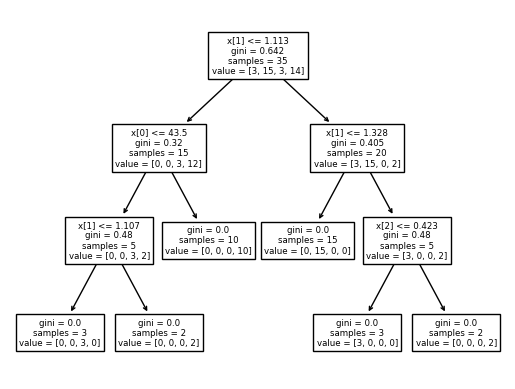

In [745]:
tree.plot_tree(clf)